In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load CSV
df = pd.read_csv("teleco_data.csv")

In [3]:
print(df.shape)

(7043, 21)


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


# Exploratory Data Analysis

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Drop customerID (not useful for prediction)
df = df.drop(columns=['customerID'])

# Binary encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


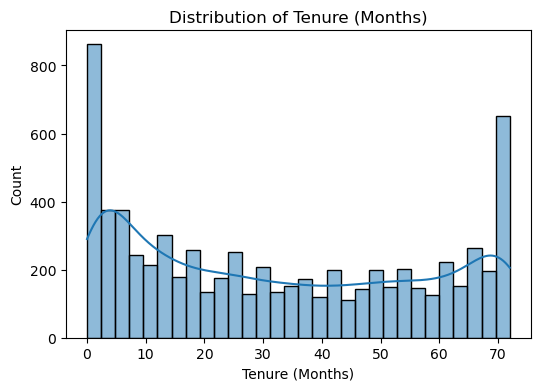

In [11]:
# 1. Univariate - tenure
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

**Tenure**

The tenure histogram shows that a large number of customers are either very new (0–12 months) or have been with the company for several years. The bivariate analysis reveals that customers with shorter tenures have a significantly higher churn rate, indicating the early stages of the customer lifecycle are most vulnerable.

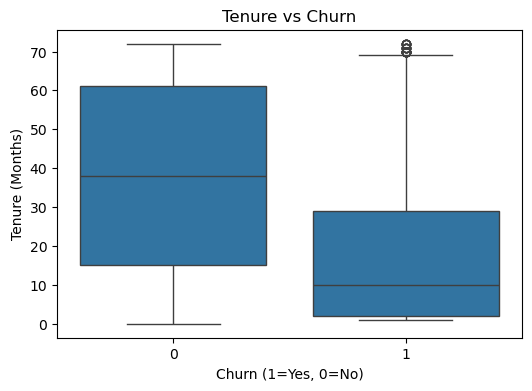

In [12]:
# 2. Bivariate - tenure vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (1=Yes, 0=No)")
plt.ylabel("Tenure (Months)")
plt.show()

**Tenure vs Churn**

This plot compares customer tenure (in months) against churn status. It shows a clear pattern where customers with shorter tenure are significantly more likely to churn compared to those who have been with the company longer. This suggests that the early stages of the customer relationship are the most vulnerable, and targeted retention strategies during the first year could help reduce churn.

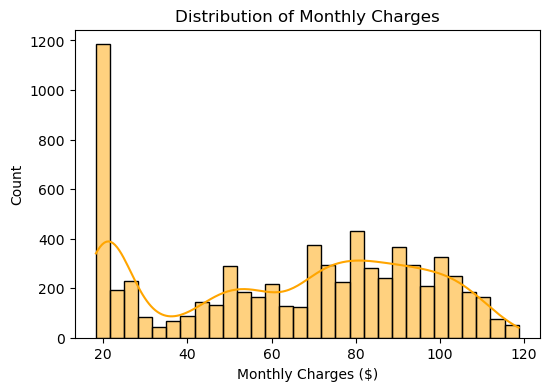

In [13]:
# 3. Univariate - MonthlyCharges
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='orange')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

**Monthly Charges**  

This visualization displays the distribution of customers based on their monthly charges. It reveals that customers are spread across a wide range of charges, with noticeable peaks at both lower and higher amounts. Higher monthly charges are linked to increased churn, suggesting that customers on premium or multiple service plans may be more price-sensitive and could benefit from loyalty discounts or bundled offers.

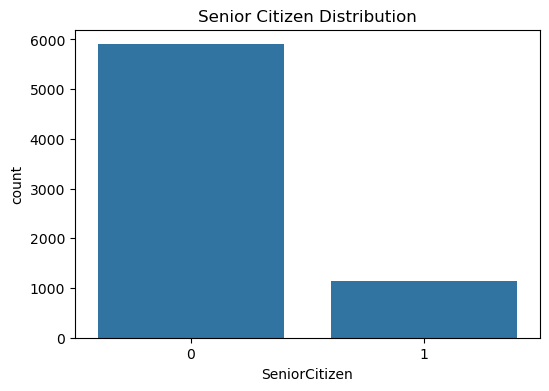

In [14]:
# 4. Univariate - Senior citizen distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title("Senior Citizen Distribution")
plt.show()

**Senior Citizen Distribution**

This plot shows the proportion of customers who are senior citizens versus those who are not. The majority of the customer base is made up of non-senior citizens. While seniors form a smaller segment, this demographic can have different service needs and retention patterns, making it valuable to assess their churn behavior separately in targeted retention strategies.


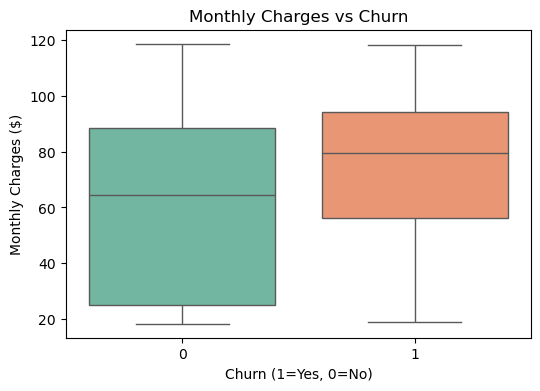

In [15]:
# 5. Bivariate - MonthlyCharges vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (1=Yes, 0=No)")
plt.ylabel("Monthly Charges ($)")
plt.show()

**Monthly Charges vs Churn**

This plot compares monthly charges between churned and retained customers. It shows that customers who churn generally have higher monthly charges compared to those who stay. This indicates a potential price sensitivity issue — customers paying more per month may be more likely to leave if they do not perceive sufficient value for the cost.


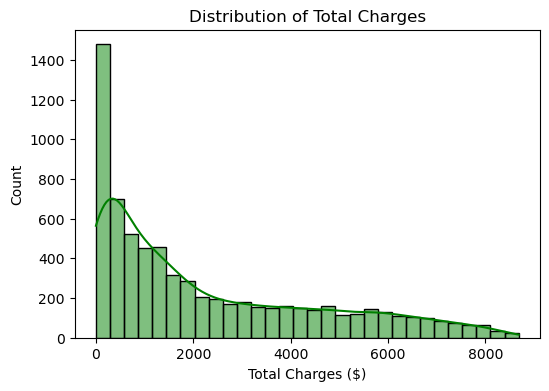

In [16]:
# 6. Univariate - TotalCharges
plt.figure(figsize=(6,4))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.show()

**Total Charges**

This visualization shows the distribution of total charges accumulated by customers over their entire tenure. The data is right-skewed, with many customers having low total charges due to shorter service durations. Customers with lower total charges are more likely to churn, reinforcing the link between churn risk and shorter customer lifetimes.


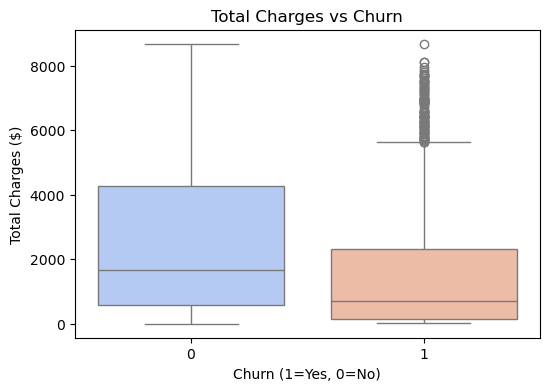

In [17]:
# 7. Bivariate - TotalCharges vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='coolwarm')
plt.title("Total Charges vs Churn")
plt.xlabel("Churn (1=Yes, 0=No)")
plt.ylabel("Total Charges ($)")
plt.show()

**Total Charges vs Churn**

This plot compares total charges between churned and retained customers. Customers who churn tend to have lower total charges, which is often a result of shorter tenure. This pattern highlights that new or recently acquired customers are at greater risk of leaving before they build long-term value for the company.


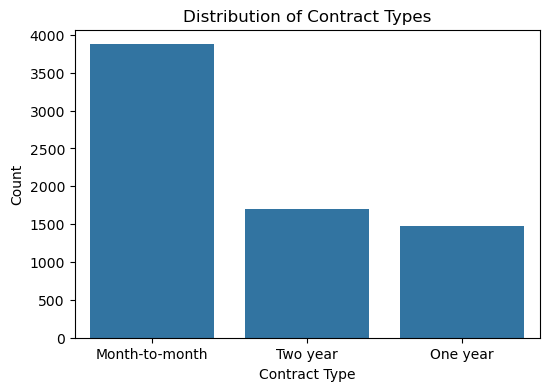

In [18]:
# 8. Univariate - Contract
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=df, order=df['Contract'].value_counts().index)
plt.title("Distribution of Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

**Contract**

This visualization shows the distribution of customers across different contract types: month-to-month, one-year, and two-year. The majority of customers are on month-to-month contracts, which also corresponds with the highest churn rates. Customers with one-year or two-year contracts churn far less, indicating that longer-term commitments are a strong factor in customer retention.


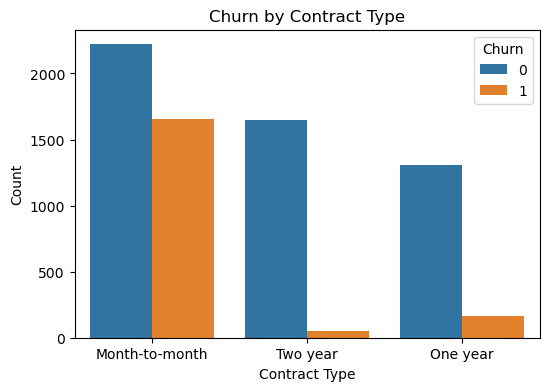

In [19]:
# 9. Bivariate - Contract vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, order=df['Contract'].value_counts().index)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

**Contract vs Churn**

This plot compares churn rates across different contract types. It clearly shows that month-to-month customers have the highest churn, while one-year and two-year contract customers are much more likely to stay. This highlights the stabilizing effect of longer-term contracts and suggests that encouraging customers to switch from short-term to long-term plans could significantly reduce churn.


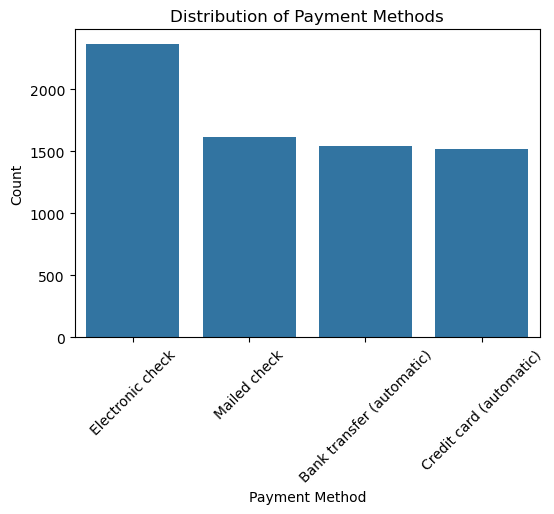

In [20]:
# 10. Univariate - PaymentMethod
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', data=df, order=df['PaymentMethod'].value_counts().index)
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Payment Method**

This visualization shows the distribution of customers across various payment methods, such as electronic check, mailed check, bank transfer, and credit card automatic payments. Electronic check is the most common method but is also associated with higher churn. In contrast, automatic payment methods like bank transfer or credit card show lower churn, suggesting that payment convenience and automation may improve customer retention.


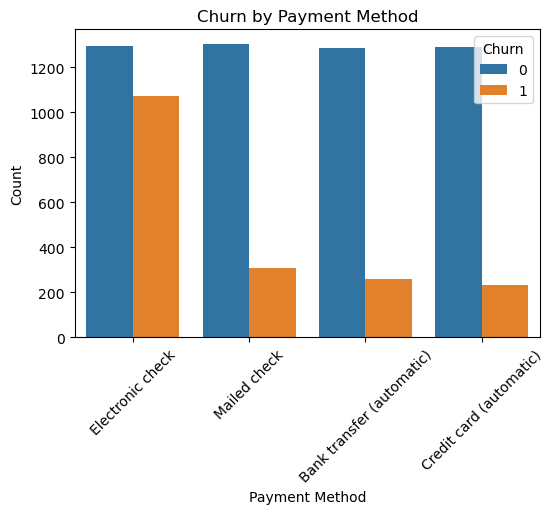

In [21]:
# 11. Bivariate - PaymentMethod vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, order=df['PaymentMethod'].value_counts().index)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Payment Method vs Churn**

This plot compares churn rates across different payment methods. Customers paying via electronic check have the highest churn, while those using automatic bank transfers or credit card payments churn significantly less. This suggests that promoting automatic payment options could help reduce churn by increasing convenience and commitment.


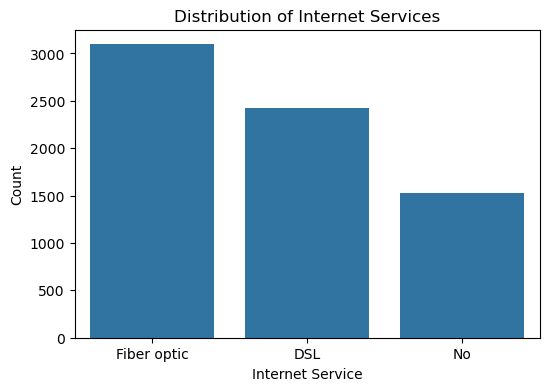

In [22]:
# 12. Univariate - InternetService
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', data=df, order=df['InternetService'].value_counts().index)
plt.title("Distribution of Internet Services")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()

**Internet Service**
This visualization shows the distribution of customers by internet service type: Fiber optic, DSL, and No internet service. Fiber optic has the largest share, followed by DSL, with a smaller group having no internet service. Notably, churn is more prevalent among fiber optic customers compared to DSL users, which may be due to higher costs, competitive alternatives, or service quality perceptions.


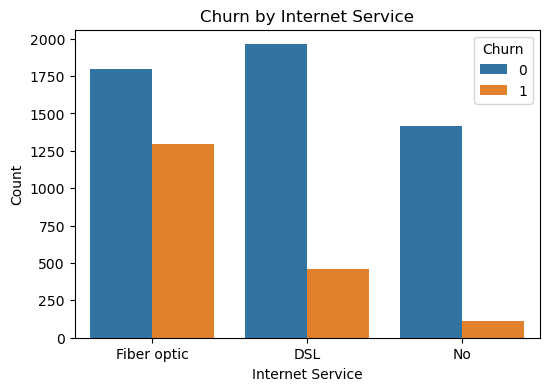

In [23]:
# 13. Bivariate - InternetService vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df, order=df['InternetService'].value_counts().index)
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()

**Internet Service vs Churn**

This plot compares churn rates across different internet service types. Customers with fiber optic service exhibit the highest churn rates, while DSL customers churn less, and those without internet service have the lowest churn. This pattern suggests that fiber optic customers may be more price-sensitive or have higher service expectations, making them more prone to switching providers.

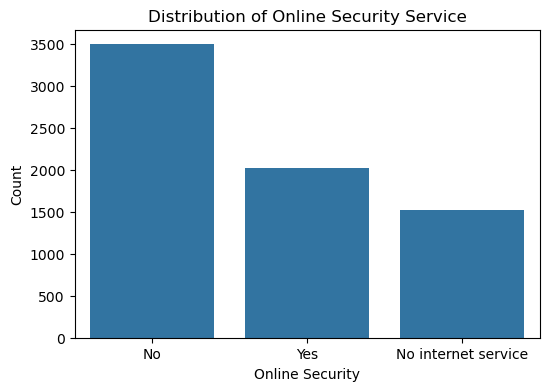

In [24]:
# 14. Univariate - OnlineSecurity
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', data=df, order=df['OnlineSecurity'].value_counts().index)
plt.title("Distribution of Online Security Service")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

**Online Security**

This visualization shows the distribution of customers based on whether they subscribe to online security services. A significant portion of customers do not have online security. Those without this service represent a larger share of churn cases, suggesting that online security may act as a value-added feature that encourages customer loyalty.


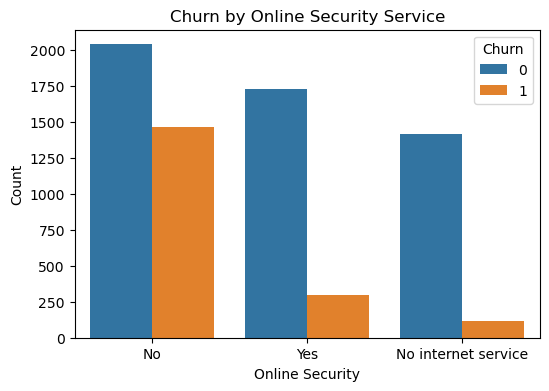

In [25]:
# 15. Bivariate - OnlineSecurity vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, order=df['OnlineSecurity'].value_counts().index)
plt.title("Churn by Online Security Service")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

**Online Security vs Churn**

This plot compares churn rates between customers with and without online security services. Customers who do not subscribe to online security churn at a much higher rate than those who do, indicating that offering or bundling online security could help reduce churn by increasing perceived value and service stickiness.


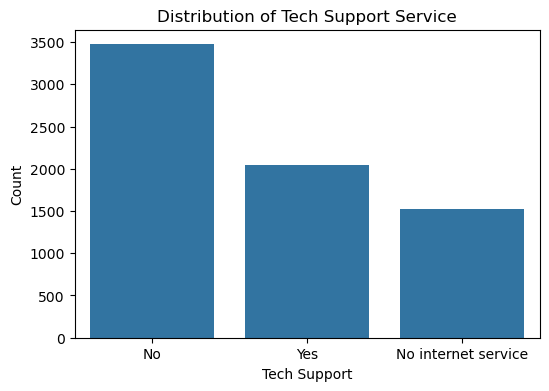

In [26]:
# 16. Univariate - TechSupport
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', data=df, order=df['TechSupport'].value_counts().index)
plt.title("Distribution of Tech Support Service")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

**Tech Support**

This visualization shows the distribution of customers based on whether they have subscribed to technical support services. Most customers do not have tech support, and this group accounts for a higher share of churn cases. This suggests that access to technical assistance may improve customer satisfaction and reduce the likelihood of churn.


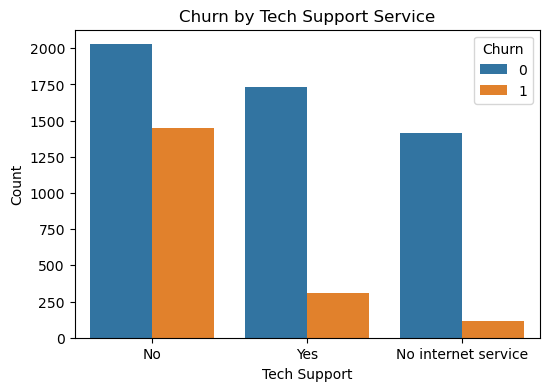

In [27]:
# 17. Bivariate - TechSupport vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df, order=df['TechSupport'].value_counts().index)
plt.title("Churn by Tech Support Service")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

**Tech Support vs Churn**

This plot compares churn rates between customers with and without technical support services. Customers without tech support churn at significantly higher rates, indicating that providing or promoting technical assistance could be an effective retention strategy by addressing service issues promptly.


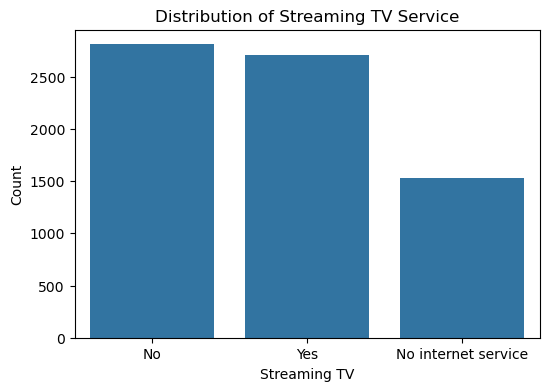

In [28]:
# 18. Univariate - StreamingTV
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV', data=df, order=df['StreamingTV'].value_counts().index)
plt.title("Distribution of Streaming TV Service")
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.show()

**Streaming TV**

This visualization shows the distribution of customers based on whether they subscribe to streaming TV services. The customer base is fairly evenly split between those who have it and those who don’t, with a smaller group having no internet service. While streaming TV is a popular add-on, it does not appear to be a strong factor in reducing churn on its own.


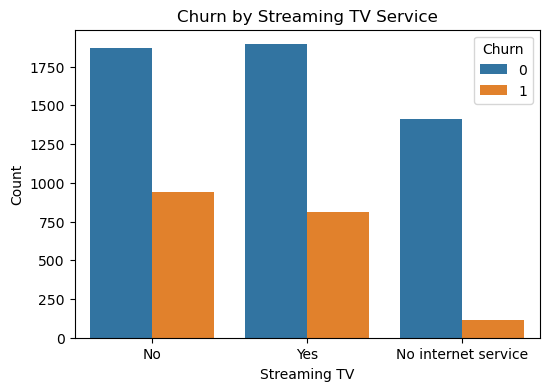

In [29]:
# 19. Bivariate - StreamingTV vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV', hue='Churn', data=df, order=df['StreamingTV'].value_counts().index)
plt.title("Churn by Streaming TV Service")
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.show()

**Streaming TV vs Churn**

This plot compares churn rates between customers with and without streaming TV services. Customers with streaming TV show slightly higher churn rates than those without, suggesting that this service alone may not be a strong retention factor and could even contribute to churn if customers perceive it as an unnecessary added cost.


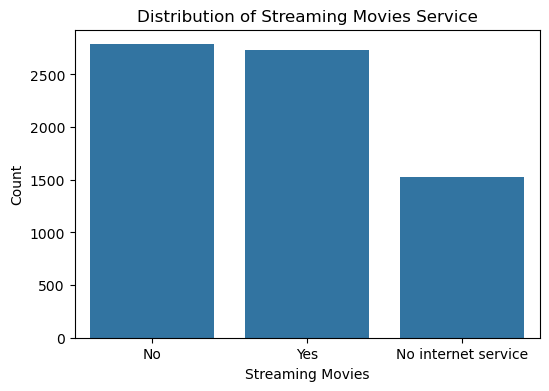

In [30]:
# 20. Univariate - StreamingMovies
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies', data=df, order=df['StreamingMovies'].value_counts().index)
plt.title("Distribution of Streaming Movies Service")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

**Streaming Movies**

This visualization shows the distribution of customers based on whether they subscribe to streaming movie services. The split between subscribers and non-subscribers is similar to streaming TV, with a small portion having no internet service. Like streaming TV, streaming movies does not appear to be a major factor in reducing churn.


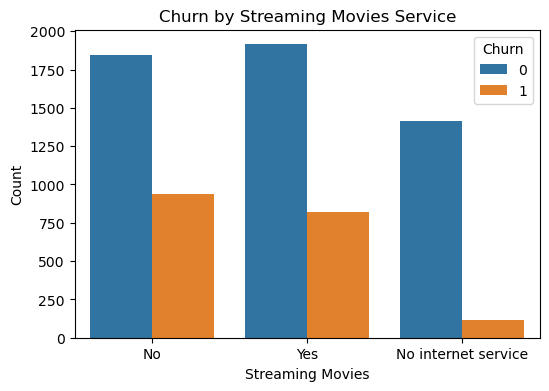

In [31]:
# 21. Bivariate - StreamingMovies vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies', hue='Churn', data=df, order=df['StreamingMovies'].value_counts().index)
plt.title("Churn by Streaming Movies Service")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

**Streaming Movies vs Churn**

This plot compares churn rates between customers with and without streaming movie services. Customers who subscribe to streaming movies have churn rates similar to those without the service, suggesting that this feature does not significantly influence customer retention and may not be a key driver of loyalty.


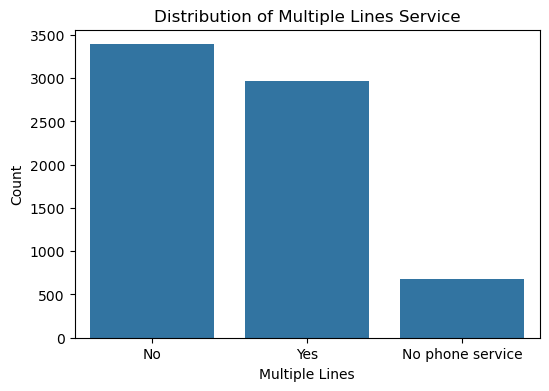

In [32]:
# 22. Univariate - MultipleLines
plt.figure(figsize=(6,4))
sns.countplot(x='MultipleLines', data=df, order=df['MultipleLines'].value_counts().index)
plt.title("Distribution of Multiple Lines Service")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.show()

**Multiple Lines**
  
This visualization shows the distribution of customers based on whether they have multiple phone lines. A considerable portion of customers have multiple lines, while others have only one or no phone service. The presence of multiple lines does not strongly correlate with churn, indicating it may not be a primary factor in customer retention.


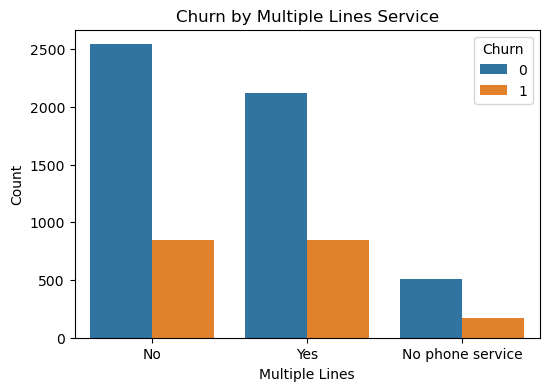

In [33]:
# 23. Bivariate - MultipleLines vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='MultipleLines', hue='Churn', data=df, order=df['MultipleLines'].value_counts().index)
plt.title("Churn by Multiple Lines Service")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.show()

**Multiple Lines vs Churn**

This plot compares churn rates between customers with and without multiple phone lines. Customers with multiple lines show only a slightly higher churn rate compared to those with a single line, suggesting that the number of lines is not a strong predictor of churn compared to factors like contract type, tenure, or service add-ons.


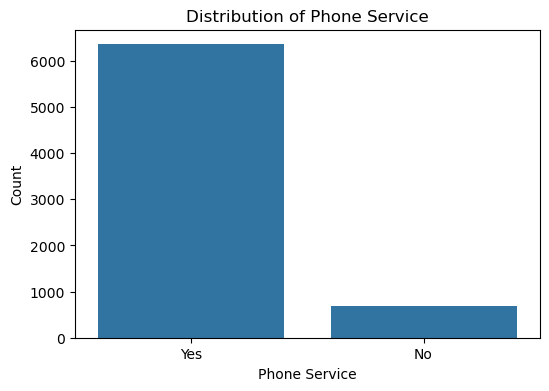

In [34]:
# 24. Univariate - PhoneService
plt.figure(figsize=(6,4))
sns.countplot(x='PhoneService', data=df, order=df['PhoneService'].value_counts().index)
plt.title("Distribution of Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.show()

**Phone Service**

This visualization shows the distribution of customers based on whether they have phone service. The majority of customers subscribe to phone service, while a smaller portion does not. The presence or absence of phone service alone does not appear to have a significant impact on churn risk.


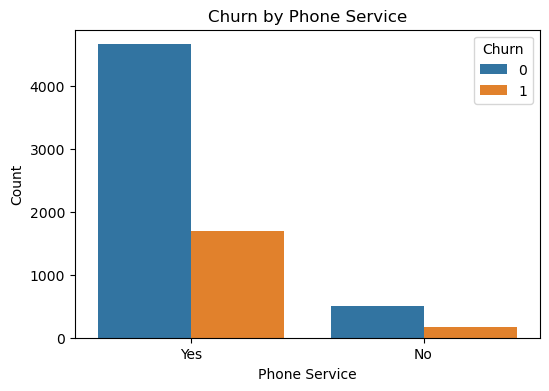

In [35]:
# 25. Bivariate - PhoneService vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='PhoneService', hue='Churn', data=df, order=df['PhoneService'].value_counts().index)
plt.title("Churn by Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.show()

**Phone Service vs Churn**

This plot compares churn rates between customers with and without phone service. The churn rates are very similar for both groups, indicating that having phone service is not a strong factor influencing whether a customer stays or leaves.


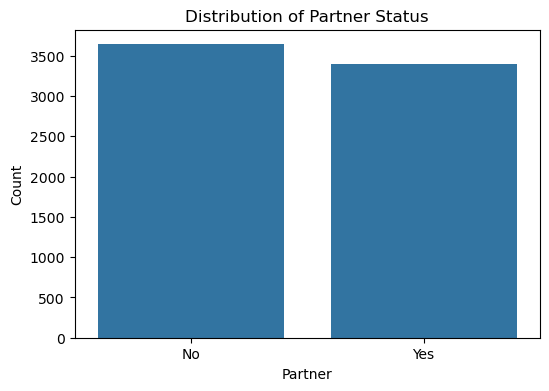

In [36]:
# 26. Univariate - Partner
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', data=df, order=df['Partner'].value_counts().index)
plt.title("Distribution of Partner Status")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

**Partner**

This visualization shows the distribution of customers based on whether they have a partner. Slightly more customers do not have a partner compared to those who do. Partner status appears to have some relationship with churn, as customers without a partner tend to show higher churn rates, potentially reflecting differences in stability or long-term commitment.


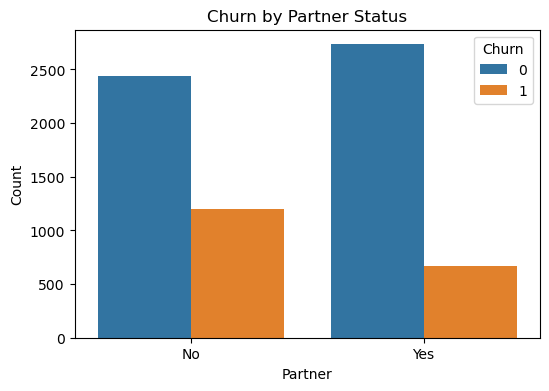

In [37]:
# 27. Bivariate - Partner vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df, order=df['Partner'].value_counts().index)
plt.title("Churn by Partner Status")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

**Partner vs Churn**

This plot compares churn rates between customers with and without a partner. Customers without a partner have noticeably higher churn rates, suggesting that partner status may be linked to greater stability and a lower likelihood of switching providers.


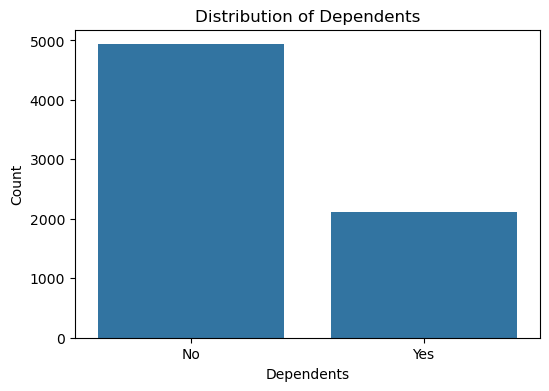

In [38]:
# 28. Univariate - Dependents
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', data=df, order=df['Dependents'].value_counts().index)
plt.title("Distribution of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

**Dependents**

This visualization shows the distribution of customers based on whether they have dependents. The majority of customers do not have dependents. Customers without dependents form a larger portion of churn cases, indicating that family responsibilities may be associated with greater service loyalty.


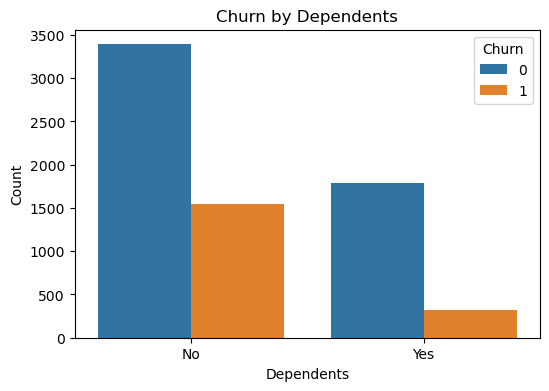

In [39]:
# 29. Bivariate - Dependents vs churn
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', hue='Churn', data=df, order=df['Dependents'].value_counts().index)
plt.title("Churn by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

**Dependents vs Churn**

This plot compares churn rates between customers with and without dependents. Customers without dependents exhibit higher churn rates, suggesting that having dependents may be linked to increased stability and a lower likelihood of switching providers.


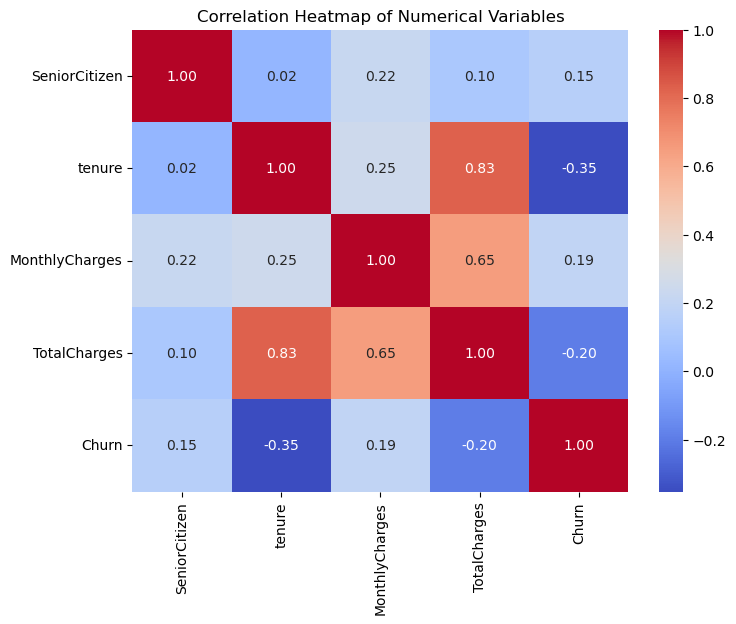

In [40]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

**Correlation Heatmap**

The correlation heatmap displays the pairwise correlation coefficients between numerical variables in the dataset. It reveals a strong positive correlation between **Total Charges** and **Tenure**, which is expected since customers who stay longer accumulate higher total charges. **Monthly Charges** show only a weak correlation with tenure, indicating that monthly billing amounts vary widely regardless of customer duration. The target variable **Churn** has a negative correlation with tenure and total charges, reinforcing the observation that newer customers are more likely to churn. Other correlations are relatively weak, suggesting that no single numeric variable alone can fully explain churn, making multivariate modeling necessary.


# Feature Engineering

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [42]:
# Custom Transformer for Feature Engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Tenure group
        X['tenure_group'] = pd.cut(
            X['tenure'],
            bins=[0, 12, 24, 48, 60, 72],
            labels=['0-1yr', '1-2yr', '2-4yr', '4-5yr', '5-6yr']
        )
        
        # Average monthly spend
        X['avg_monthly_spend'] = X['TotalCharges'] / X['tenure'].replace(0, 1)
        
        # Fiber internet flag
        X['has_fiber'] = (X['InternetService'] == 'Fiber optic').astype(int)
        
        # Add-on services count
        service_cols = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
        X['num_addons'] = X[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)
        
        # Auto payment flag
        X['auto_payment'] = X['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)
        
        # Streaming service flag
        X['has_streaming'] = X[['StreamingTV', 'StreamingMovies']].apply(lambda x: any(x == 'Yes'), axis=1).astype(int)
        
        return X

In [43]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [44]:
# Apply feature engineering
fe = FeatureEngineer()
X_engineered = fe.transform(X)

In [45]:
# Identify categorical and numerical columns after engineering
cat_cols = X_engineered.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X_engineered.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [46]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [47]:
num_cols

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'avg_monthly_spend',
 'has_fiber',
 'num_addons',
 'auto_payment',
 'has_streaming']

In [48]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,avg_monthly_spend,has_fiber,num_addons,auto_payment,has_streaming
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,...,No,Electronic check,49.20,1701.65,2-4yr,48.618571,0,2,0,1
3151,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,...,No,Mailed check,75.10,1151.55,1-2yr,76.770000,1,1,0,0
4860,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,...,No,Mailed check,40.55,590.35,1-2yr,45.411538,0,2,0,0
3867,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,...,Yes,Credit card (automatic),73.50,1905.70,2-4yr,73.296154,0,2,1,1
3810,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,...,No,Electronic check,44.55,44.55,0-1yr,44.550000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,...,No,Electronic check,109.25,7707.70,5-6yr,108.559155,1,3,0,1
6227,Male,0,No,No,2,Yes,No,DSL,No,No,...,No,Bank transfer (automatic),46.05,80.35,0-1yr,40.175000,0,0,1,0
4673,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Mailed check,102.80,2660.20,2-4yr,106.408000,1,3,0,1
2710,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,...,No,Credit card (automatic),20.40,482.80,1-2yr,20.116667,0,0,1,0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb

# -------------------
# Logistic Regression Pipeline
log_reg_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_reg_pipe.fit(X_train, y_train)
y_pred_lr = log_reg_pipe.predict(X_test)
y_proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

# -------------------
# Random Forest Pipeline
rf_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
y_proba_rf = rf_pipe.predict_proba(X_test)[:, 1]

print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# -------------------
# XGBoost Pipeline
xgb_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb.XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.1,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
y_proba_xgb = xgb_pipe.predict_proba(X_test)[:, 1]

print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8418868996874111

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC: 0.820607610633186

XGBoost
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      

In [54]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
import numpy as np

# 1. Pipeline with Preprocessor + SMOTE + Logistic Regression
pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

# 2. Hyperparameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs'],
    'model__class_weight': [None, 'balanced']
}

# 3. GridSearchCV with ROC-AUC scoring
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [55]:
# Cross-validation performance for best model
final_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        C=grid.best_params_['model__C'],
        penalty=grid.best_params_['model__penalty'],
        solver=grid.best_params_['model__solver'],
        class_weight=grid.best_params_['model__class_weight'],
        max_iter=1000
    ))
])

cv_scores = cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))
print("Std Dev ROC-AUC:", np.std(cv_scores))

#  Refit final model on full training set
final_pipe.fit(X_train, y_train)

# Predictions on test set (default 0.5 threshold)
y_proba = final_pipe.predict_proba(X_test)[:, 1]
y_pred_default = (y_proba >= 0.5).astype(int)

print("\n=== Default Threshold (0.5) ===")
print(classification_report(y_test, y_pred_default))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (Default Threshold):\n", cm)

Cross-Validation ROC-AUC Scores: [0.86590164 0.85465642 0.85092014 0.83862068 0.81917759]
Mean ROC-AUC: 0.8458552938936178
Std Dev ROC-AUC: 0.01593115109232515

=== Default Threshold (0.5) ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

ROC-AUC: 0.8402929551267146

Confusion Matrix (Default Threshold):
 [[750 285]
 [ 78 296]]


In [56]:
# Refit on full training set with best params
best_model = grid.best_estimator_

# Predictions on test set
y_proba = best_model.predict_proba(X_test)[:, 1]

# Default threshold evaluation
y_pred_default = (y_proba >= 0.5).astype(int)
print("\n=== Default Threshold (0.5) ===")
print(classification_report(y_test, y_pred_default))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Threshold tuning for higher recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
target_recall = 0.80
threshold_index = np.argmax(recall >= target_recall)
best_threshold = thresholds[threshold_index]

y_pred_adj = (y_proba >= best_threshold).astype(int)
print(f"\n=== Adjusted Threshold ({best_threshold:.2f}) for Recall ≥ {target_recall} ===")
print(classification_report(y_test, y_pred_adj))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix for adjusted threshold
cm = confusion_matrix(y_test, y_pred_adj)
print("\nConfusion Matrix (Adjusted Threshold):\n", cm)


=== Default Threshold (0.5) ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

ROC-AUC: 0.8402929551267146

=== Adjusted Threshold (0.01) for Recall ≥ 0.8 ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409

ROC-AUC: 0.8402929551267146

Confusion Matrix (Adjusted Threshold):
 [[   0 1035]
 [   0  374]]


In [57]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
import numpy as np

# y_proba is the probability predictions from your best Logistic Regression model
# Example: y_proba = best_model.predict_proba(X_test)[:, 1]

# ===========================
# Balanced threshold search
# ===========================
target_recall = 0.80       # Minimum recall you want for churners
target_precision = 0.40    # Minimum acceptable precision

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Store valid thresholds that meet both recall and precision targets
valid_thresholds = [
    (t, p, r) 
    for t, p, r in zip(thresholds, precision[:-1], recall[:-1])
    if r >= target_recall and p >= target_precision
]

# Pick the threshold with the best F1-score among valid ones
if valid_thresholds:
    best_threshold, best_precision, best_recall = max(
        valid_thresholds, 
        key=lambda x: 2 * (x[1] * x[2]) / (x[1] + x[2])  # F1-score formula
    )
else:
    print("No threshold meets both precision and recall targets — consider lowering one of them.")
    best_threshold = 0.5  # fallback

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision at best threshold: {best_precision:.2f}")
print(f"Recall at best threshold: {best_recall:.2f}")

# ===========================
# Evaluate at this threshold
# ===========================
y_pred_adj = (y_proba >= best_threshold).astype(int)

print("\n=== Balanced Threshold Classification Report ===")
print(classification_report(y_test, y_pred_adj))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred_adj)
print("\nConfusion Matrix:\n", cm)


Best Threshold: 0.48
Precision at best threshold: 0.51
Recall at best threshold: 0.81

=== Balanced Threshold Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.81      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8402929551267146

Confusion Matrix:
 [[740 295]
 [ 72 302]]


# Final evaluation visuals

## ROC curve

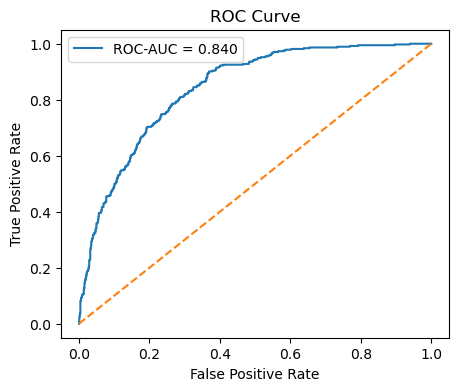

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(); plt.show()

## Precision–Recall curve (mark your chosen threshold = 0.48)

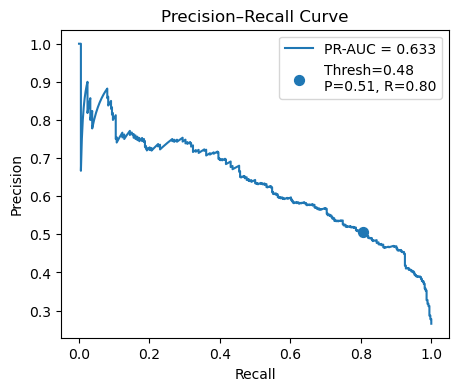

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

prec, rec, thr = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC = {ap:.3f}")

# Mark chosen threshold
# Find closest index to 0.48 in thr (note: thr is length-1 vs prec/rec)
idx = np.argmin(np.abs(thr - 0.48))
plt.scatter(rec[idx], prec[idx], s=50, marker='o', label=f"Thresh=0.48\nP={prec[idx]:.2f}, R={rec[idx]:.2f}")

plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(); plt.show()


## Confusion matrix heatmap (at 0.48)

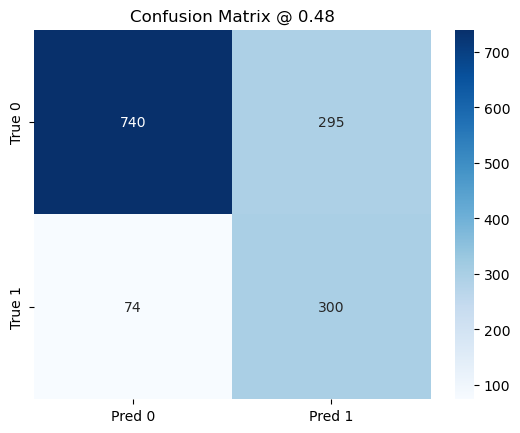

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_048 = (y_proba >= 0.48).astype(int)
cm = confusion_matrix(y_test, y_pred_048, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.title("Confusion Matrix @ 0.48"); plt.show()


## Coefficient importances

In [61]:
# Get feature names after preprocessing
ohe = final_pipe.named_steps['preprocess'].named_transformers_['cat']
num_cols_after = final_pipe.named_steps['preprocess'].transformers_[0][2]  # numeric cols
cat_cols_after = ohe.get_feature_names_out()

feature_names = np.concatenate([num_cols_after, cat_cols_after])
coefs = final_pipe.named_steps['model'].coef_.ravel()

coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values('abs_coef', ascending=False).head(20)

,feature,coef,abs_coef
2,MonthlyCharges,-2.133807,2.133807
1,tenure,-1.366566,1.366566
55,tenure_group_nan,-1.311708,1.311708
5,has_fiber,0.905406,0.905406
43,Contract_Two year,-0.878454,0.878454
54,tenure_group_5-6yr,0.819157,0.819157
41,Contract_Month-to-month,0.696715,0.696715
53,tenure_group_4-5yr,0.660703,0.660703
6,num_addons,0.597829,0.597829
40,StreamingMovies_Yes,0.450703,0.450703


## Permutation importance

In [62]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    final_pipe, X_test, y_test,
    n_repeats=10, scoring='roc_auc', n_jobs=-1, random_state=42
)

# Use original columns to match r.importances_mean length
feature_names = X_test.columns

pi = pd.DataFrame({
    'feature': feature_names,
    'importance': r.importances_mean
}).sort_values('importance', ascending=False)

print(pi.head(20))

              feature  importance
4              tenure    0.187649
17     MonthlyCharges    0.123682
21          has_fiber    0.082020
14           Contract    0.043863
22         num_addons    0.021679
13    StreamingMovies    0.011402
8      OnlineSecurity    0.011046
11        TechSupport    0.011035
19       tenure_group    0.009854
12        StreamingTV    0.009687
7     InternetService    0.008627
24      has_streaming    0.008364
6       MultipleLines    0.008291
18       TotalCharges    0.004606
9        OnlineBackup    0.003363
10   DeviceProtection    0.003252
15   PaperlessBilling    0.003199
16      PaymentMethod    0.002742
20  avg_monthly_spend    0.001777
5        PhoneService    0.001447


## Calibrate probabilities

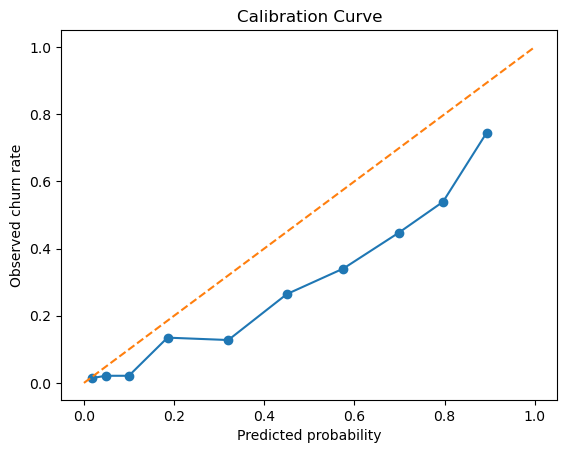

In [63]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'--')
plt.xlabel("Predicted probability"); plt.ylabel("Observed churn rate")
plt.title("Calibration Curve"); plt.show()

## Save the model + threshold for deployment

In [64]:
import joblib, json

joblib.dump(final_pipe, "models/final_logreg_smote_pipeline.joblib")
with open("models/threshold.json", "w") as f:
    json.dump({"threshold": 0.48}, f)

## Scoring helper for new data

In [65]:
import json, joblib
import pandas as pd

pipe = joblib.load("models/final_logreg_smote_pipeline.joblib")
thr = json.load(open("models/threshold.json"))["threshold"]

def score_customers(df_new: pd.DataFrame):
    p = pipe.predict_proba(df_new)[:,1]
    yhat = (p >= thr).astype(int)
    out = df_new.copy()
    out["p_churn"] = p
    out["churn_pred"] = yhat
    return out


## simple lift / decile chart

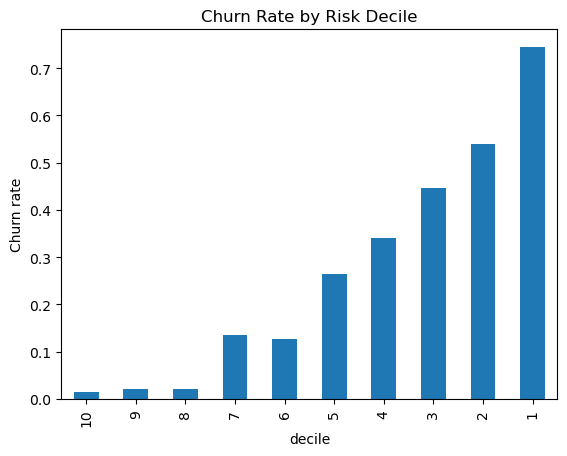

In [66]:
import numpy as np
bins = pd.qcut(y_proba, 10, labels=False, duplicates="drop")  # 0=lowest risk … 9=highest
deciles = pd.DataFrame({'decile': bins, 'churn': y_test})
lift = deciles.groupby('decile')['churn'].mean().sort_index(ascending=True)
lift.index = 10 - lift.index  # make 10 = highest risk
lift.plot(kind='bar'); plt.title("Churn Rate by Risk Decile"); plt.ylabel("Churn rate"); plt.show()